<a href="https://colab.research.google.com/github/Nagasai122/Teslasalesforecast/blob/main/Teslasalesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Nagasai122/Teslasalesforecast/main/TSLA.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [7]:
df.shape

(2416, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [10]:
df['Date']=pd.to_datetime(df.Date)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.2 KB


In [14]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [15]:
df.drop(columns=['Adj Close'],axis=1,inplace=True)

In [16]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [18]:
df.duplicated().sum()

0

In [19]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [21]:
df.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

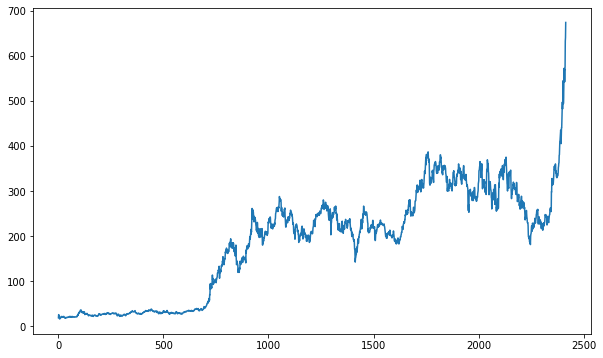

In [22]:
df['Open'].plot(figsize=(10,6))

In [23]:
X = df[['Open','High','Low','Volume']]
y = df['Close']

In [25]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [26]:
X_train.shape

(1812, 4)

In [27]:
X_test.shape

(604, 4)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [30]:
regressor.fit(X_train,y_train)

LinearRegression()

In [31]:
regressor.coef_

array([-6.44559786e-01,  9.10894561e-01,  7.32277699e-01, -2.27287003e-08])

In [32]:
regressor.intercept_

-0.02827081942527343

In [33]:
y_pred = regressor.predict(X_test)

In [34]:
print(X_test)

            Open        High         Low   Volume
410    31.549999   32.060001   30.900000  1157900
199    25.080000   25.209999   24.299999  1357400
1670  280.000000  282.239990  276.440002  4947900
1934  333.750000  336.369995  327.029999  4285700
1036  255.479996  263.739990  255.000000  8101300
...          ...         ...         ...      ...
409    32.259998   32.270000   29.840000  1874200
1437  214.270004  218.970001  211.500000  3180500
313    25.490000   26.620001   25.350000  1156400
1927  347.829987  354.989990  347.100006  5817400
1308  252.050003  254.250000  248.300003  3390800

[604 rows x 4 columns]


In [35]:
y_pred.shape

(604,)

In [36]:
dframe=pd.DataFrame(y_test,y_pred)

In [37]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [38]:
print(dfr)

          Actual   Predicted
410    31.490000   31.440212
199    24.650000   24.533316
1670  279.760010  278.904250
1934  328.200012  330.626866
1036  259.320007  262.085601
...          ...         ...
409    31.100000   30.381368
1437  218.339996  216.124929
313    26.379999   26.326871
1927  352.049988  353.174330
1308  248.910004  250.852862

[604 rows x 2 columns]


In [40]:
r2 = r2_score(y_test,y_pred)
r2

0.9997162319146498

In [42]:
regressor.score(X_test,y_test)

0.9997162319146498

In [44]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 1.3384135958588976


In [45]:
print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))

Mean Squared Error:  4.322400559203995


In [46]:
print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error:  2.079038373672789


In [47]:
graph= dfr.head(20)

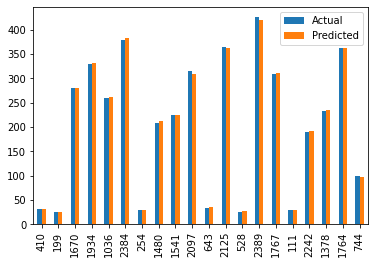

In [50]:
graph.plot(kind='bar')